In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import math
from scipy import signal
from scipy.fftpack import fft
from scipy import ndimage
%matplotlib inline


In [2]:
dt=0.01
nstep = 5000
# T=np.arange(dt,Tot,dt)


alpha = 1/0.024
beta = 1./1.
k = alpha
phi = 1.
g = beta*50

k*g*phi/alpha/beta,  beta*k/(alpha*beta+k*g*phi)

(49.99999999999999, 0.019607843137254905)

In [8]:
x = np.random.randn(nstep+99)
y = np.zeros(nstep)
z = np.zeros(nstep)
T = np.arange(100)*dt
tau_y = 0.08
Ky=T/tau_y/tau_y*np.exp(-T/tau_y)
s = np.convolve(x,Ky,'valid')
for i in range(nstep-1):
    dyj =(-alpha*y[i]+k*(s[i]-z[i]))*dt
    y[i+1] = (y[i]+dyj)
    dzj =(-beta*z[i]+g*y[i])*dt
    z[i+1] = (z[i]+dzj)

In [9]:
# activation function
def nA(x,theta):
    y = np.zeros(len(x))
    y[np.where(x>theta)]= 1
    return(y)

def STA(r, x, v, dt, window):
    negshift=round(window[0]/dt) # second
    posshift=round(window[1]/dt) # second
    xSTS = np.zeros(posshift-negshift)
    vSTS = np.zeros(posshift-negshift)
    for i in np.arange(-negshift, len(r)-posshift):
        xSTS = xSTS + x[i+negshift:i+posshift]*r[i]
        vSTS = vSTS + v[i+negshift:i+posshift]*r[i]
        
    xSTA = xSTS/sum(r[-negshift:len(r)-posshift])
    vSTA = vSTS/sum(r[-negshift:len(r)-posshift])
    time = np.arange(negshift*dt, posshift*dt, dt)
    return time, xSTA, vSTA

In [10]:
sum(nA(y, np.std(y)))/len(y)

0.1576

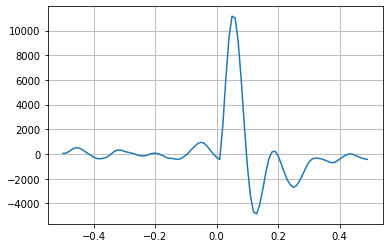

In [11]:
plt.plot(np.arange(-50,50)*dt,np.correlate(y, x[99:], 'same')[2450:2550])
plt.grid()

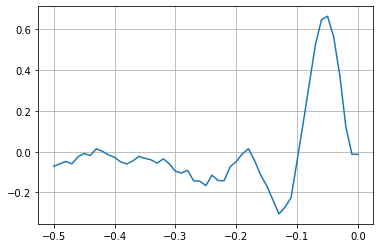

In [12]:
time, xSTA, _ = STA(nA(y, np.std(y)), x[99:], x[99:], dt, [-0.5,dt])
plt.plot(time, xSTA)
plt.grid()